In [27]:
# Import Julia packages
using DrWatson
@quickactivate
using Revise
using LinearAlgebra
using DelimitedFiles
using SparseArrays
using StaticArrays
using BlockArrays
using CairoMakie
using UnPack
using FromFile
using GeometryBasics
using Random
using Colors
using JLD2
using LaTeXStrings
using Glob
using Printf
using ColorSchemes
using Statistics


@from "$(projectdir())/src/VertexModelContainers.jl" using VertexModelContainers
@from "$(projectdir())/src/Laplacians.jl" using Laplacians
@from "$(projectdir())/src/AnalysisFunctions.jl" using AnalysisFunctions
@from "$(projectdir())/src/CellProperties.jl" using CellProperties

In [3]:
function makeEold(matrices, params)


    @unpack edgeTangents,A, Ā, B, C= matrices
    @unpack nCells, nEdges, nVerts = params



    vertexAreas=zeros(nVerts)
    edgeMidpointLinks=fill(SVector{2, Float64}(zeros(2)), (nCells, nVerts))

    nzC = findnz(C)
    ikPairs = tuple.(nzC[1],nzC[2])
    for (i,k) in ikPairs
        for j=1:nEdges
            edgeMidpointLinks[i,k] = edgeMidpointLinks[i,k] .+ 0.5.*B[i,j]*edgeTangents[j]*Ā[j,k]
        end
    end


    ##Check k_is length ==1

    for k=1:nVerts

        k_is = findall(x->x!=0, C[:,k])
        if length(k_is) == 1
            edgesSharedBy_i1_And_k = findall(x->x!=0, B[k_is[1],:])∩findall(x->x!=0, A[:,k])
            vertexAreas[k] = 0.5^3*norm([edgeTangents[edgesSharedBy_i1_And_k[1]]...,0.0]×[edgeTangents[edgesSharedBy_i1_And_k[2]]...,0.0])
        elseif length(k_is) == 2
            edgesSharedBy_i1_And_k = findall(x->x!=0, B[k_is[1],:])∩findall(x->x!=0, A[:,k])
            vertexAreas[k] = 0.5^3*norm([edgeTangents[edgesSharedBy_i1_And_k[1]]...,0.0]×[edgeTangents[edgesSharedBy_i1_And_k[2]]...,0.0])
            edgesSharedBy_i2_And_k = findall(x->x!=0, B[k_is[2],:])∩findall(x->x!=0, A[:,k])
            vertexAreas[k] += 0.5^3*norm([edgeTangents[edgesSharedBy_i2_And_k[1]]...,0.0]×[edgeTangents[edgesSharedBy_i2_And_k[2]]...,0.0])
        else
            vertexAreas[k] = 0.5*norm([edgeMidpointLinks[k_is[1], k]...,0.0]×[edgeMidpointLinks[k_is[2],k]...,0.0])
        end
    end

    E=Diagonal(vertexAreas)

    return(E)

end

makeEold (generic function with 1 method)

In [74]:
f=Glob.glob("new_energy/Hex_relax/relaxed","C:\\Users\\v35431nc\\Documents\\VM_code\\VertexModel\\data\\sims" )[end]
ff=Glob.glob("systemData*L0_1.0*Gamma_0.5*.jld2",f)[end]
@unpack R, matrices, params = load(ff)
@unpack nCells,nVerts, γ, L₀ = params
@unpack cellAreas,cellPerimeters, cellTensions, cellPressures, cellEdgeCount, edgeTangents,vertexAreas,A,Ā,B,B̄,C, ϵ = matrices
print(sort(norm.(edgeTangents)))
mkpath(datadir(f,"eigenmodes"))


[0.33893543170845386, 0.338935432511783, 0.3389354450893921, 0.3389354507905556, 0.3389354576784264, 0.3389354761961526, 0.33893555098474976, 0.33893562530793453, 0.3389356306648554, 0.3389356311847186, 0.3389356392194869, 0.3389357318017611, 0.338935750973472, 0.3389357553910362, 0.3389357557042925, 0.3389357702281325, 0.3389357780002714, 0.3389358243668306, 0.33893583418620693, 0.3389358392536302, 0.33893584609932464, 0.3389358519104289, 0.33893587120190977, 0.33893588359619664, 0.3389358967927108, 0.3389359077438137, 0.33893590829185016, 0.3389359110489128, 0.338935931608821, 0.33893593441059494, 0.3389359481742421, 0.33893595673180527, 0.33893595996913617, 0.3389359620334874, 0.33893596341687043, 0.33893597495857675, 0.33893598044999457, 0.3389359808513551, 0.3389359817408217, 0.3389359823152859, 0.33893599729370316, 0.33893600138233154, 0.3389360053163248, 0.3389360190046199, 0.3389360454657032, 0.33893604814168604, 0.3389360483100744, 0.3389360498474824, 0.3389360606101305, 0.338

┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


0.33893618423587296, 0.338936185991431, 0.33893619231485766, 0.3389361972331333, 0.338936199028811, 0.3389362002242642, 0.338936201773364, 0.3389362017777874, 0.3389362059602618, 0.3389362097660708, 0.3389362122331442, 0.3389362123486647, 0.3389362150666437, 0.33893621596019957, 0.3389362185399812, 0.33893621996980305, 0.33893622664120826, 0.33893622906172993, 0.3389362344153375, 0.33893623478618884, 0.3389362379674216, 0.33893624613124024, 0.33893624801006034, 0.3389362489371631, 0.33893625433312613, 0.33893625479057676, 0.33893625540231503, 0.3389362567562294, 0.33893625718105813, 0.3389362572930744, 0.3389362578304253, 0.33893625805608224, 0.33893625881475814, 0.3389362656467046, 0.3389362669075692, 0.3389362673847535, 0.3389362698360335, 0.33893627199937554, 0.33893627450724334, 0.3389362813486053, 0.33893628630129896, 0.3389362869706207, 0.33893629043519236, 0.3389362937773687, 0.3389362948695386, 0.33893629504634143, 0.3389362951943139, 0.33893629571452794, 0.33893629666498626, 0

"C:\\Users\\v35431nc\\Documents\\VM_code\\VertexModel\\data\\sims\\new_energy\\Hex_relax\\relaxed\\eigenmodes"

216

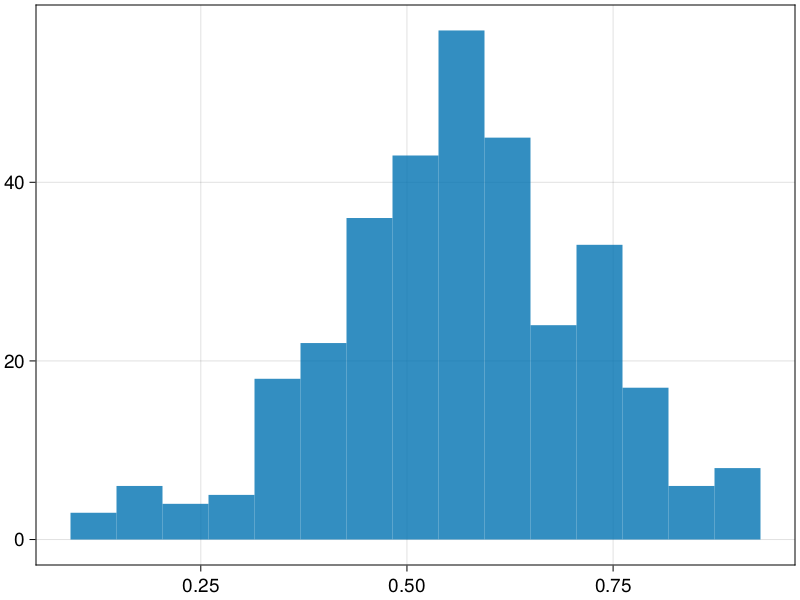

In [1355]:
hist(norm.(edgeTangents))

In [75]:
G=makeGnew(params, matrices) #update for new model
M=makeM(matrices)




Lv=makeEvLvnew(M, G, vertexAreas)
Lc=makeEvLcnew(M, G, vertexAreas)
X=makeX(params, matrices)
g=vcat(cellPressures, -cellTensions)

gX=Matrix{SMatrix{2,2,Float64,4}}(undef,nVerts,nVerts)
fill!(gX,@SMatrix zeros(2,2))

for α=1:2*nCells
     gX+=g[α]X[α, :,:]
end

In [97]:
function makeE(matrices, params)


    @unpack edgeTangents,A, Ā, B,B̄, ϵ= matrices
    dAdr= -1/2*B*Diagonal([(ϵ*T)' for T in edgeTangents])*Ā
    αik=transpose.(dAdr).*(B̄*Diagonal(edgeTangents)*A)
    Ek=vec((1/8).*sum(αik, dims=1)')
    E=Diagonal(Ek)
    return(E)
end

makeE (generic function with 1 method)

In [76]:
dAdr=-1/2*B*Diagonal([(ϵ*T) for T in edgeTangents])*Ā
#dLdr=Sum j B̄ᵢⱼ Aⱼₖ t̂ⱼ   = B̄ diag(t̂) A
dLdr= B̄*Diagonal((edgeTangents)./norm.(edgeTangents))*A

Mtemp=vcat(dAdr,dLdr)
Mflat=transpose(reshape(reinterpret(Float64,[vcat(Matrix(Mtemp)[x,:]...) for x in collect(1:2*nCells)]), ( 2*nVerts, 2*nCells)))

254×588 transpose(reshape(reinterpret(Float64, ::Vector{SVector{588, Float64}}), 588, 254)) with eltype Float64:
 0.0        0.0   0.0         …  0.0  0.0  0.0   0.0        0.0
 0.0        0.0  -6.06891e-7     0.0  0.0  0.0   0.0        0.0
 0.0        0.0   0.0            0.0  0.0  0.0   0.254202  -0.146764
 0.0        0.0   0.0            0.0  0.0  0.0  -0.254203  -0.146763
 0.0        0.0   0.0            0.0  0.0  0.0   0.0        0.0
 0.0        0.0   0.0         …  0.0  0.0  0.0   0.0        0.0
 0.0        0.0   0.0            0.0  0.0  0.0   0.0        0.0
 0.0        0.0   0.0            0.0  0.0  0.0   0.0        0.0
 0.0        0.0   0.0            0.0  0.0  0.0   0.0        0.0
 0.0        0.0   0.0            0.0  0.0  0.0   0.0        0.0
 ⋮                            ⋱            ⋮               
 0.0        0.0   0.0         …  0.0  0.0  0.0   0.0        0.0
 0.0        0.0   0.0            0.0  0.0  0.0   0.0        0.0
 0.0        0.0   0.0            0.0  0.0  0.0   

In [77]:


#E=makeE(matrices, params)
E=Diagonal(vertexAreas)
Eflat=kron(E,Matrix(1.0I, 2, 2))



LvE=Matrix(Lv)
evalLv,evecLvtemp=LAPACK.syev!('V','U',deepcopy(sqrt(Eflat)*Matrix(mortar(LvE))*inv(sqrt(Eflat))))
evecLv=inv(sqrt(Eflat))*evecLvtemp


LcE=Matrix(Lc)
evalLc,evecLctemp=LAPACK.syev!('V','U',deepcopy(sqrt(G)*Matrix(LcE)*inv(sqrt(G))))
evecLc=inv(sqrt(G))*evecLctemp


H=Matrix(mortar(LvE)).+Matrix(mortar(inv(E)*gX))
evalH,evecHtemp=LAPACK.syev!('V','U',deepcopy(sqrt(Eflat)*H*inv(sqrt(Eflat))))
evecH=inv(sqrt(Eflat))*evecHtemp

Nflat=sqrt.(G)*Mflat*inv(sqrt(Eflat))
UNF,sNF,VNF=svd(Nflat, full=true)

Y=inv(sqrt.(G))*UNF
Z=inv(sqrt.(Eflat))*VNF

D=evecLv'*Matrix(mortar(gX))*evecLv
DD=D + Diagonal(evalLv)
evalDD,evecDD=LAPACK.syev!('V','U',deepcopy(DD))


evecmap=[evecDD[:,x]'*(evecLv'*Matrix(mortar(gX))*evecLv+Diagonal(evalLv))*evecDD[:,x] for x in 1:2nVerts]
evmapLv=[evecDD[:,x]'*(Diagonal(evalLv))*evecDD[:,x] for x in 1:2nVerts]
evmapgX=[evecDD[:,x]'*(evecLv'*Matrix(mortar(gX))*evecLv)*evecDD[:,x] for x in 1:2nVerts]

#evecmap=[evecDD[:,x]'*Eflat*(evecLv'*Matrix(mortar(gX))*evecLv+Diagonal(evalLv))*evecDD[:,x] for x in 1:2nVerts]

# # evalD,evecDtemp=LAPACK.syev!('V','U',deepcopy(Dsym))
# # evecD=inv(sqrt(Eflat))*evecDtemp

# Ds=Z'*Matrix(mortar(gX))*Z
# DDs=Ds + Diagonal(vcat((sNF.^2), zeros(2*nVerts-2*nCells)))
# evalDDs,evecDDs=LAPACK.syev!('V','U',deepcopy(DDs))
# #evecDDs=inv(sqrt(Eflat))*qr(sqrt(Eflat)*evecDDstemp).Q

# uDDs, sDDs, vDDs=svd(DDs)

# s_alpha_sum=zeros(2*nCells,2*nVerts)

# for s in 1:2*nVerts
#     for p in 1:2*nCells
#         s_alpha_sum[:, s] .+= sNF[p]*evecDDs[p,s]*Y[:,p]
#     end
# end

# s_alpha_G_orthnorm=inv(sqrt(G))*qr(sqrt(G)*s_alpha_sum).Q
# s_alpha_G_norm=mapslices(x -> x /sqrt(x'*G*x), s_alpha_sum, dims=1)

MevH=Mflat*evecH
MevLv=Mflat*evecLv
# MevH_G_orthnorm=inv(sqrt(G))*qr(sqrt(G)*Mflat*evecH).Q
# MevH_G_norm=mapslices(x -> x /sqrt(x'*G*x), MevH, dims=1)

# r_alpha=zeros(2*nVerts,2*nVerts)

# for s in 1:2*nVerts
#     for p in 1:2*nVerts
#         r_alpha[:, s] .+=evecDDs[p,s]*Z[:,p]
#     end
# end

# M_r=Mflat*r_alpha
# M_r_G_orthnorm=inv(sqrt(G))*qr(sqrt(G)*M_r).Q
# M_r_G_norm=mapslices(x -> x /sqrt(x'*G*x), M_r, dims=1)

254×588 Matrix{Float64}:
  2.04184e-9    3.06321e-10  -2.26288e-9   …   1.74722       1.69128
 -9.82816e-10  -2.05847e-9   -1.03827e-9      -0.0320261    -0.0266553
  2.33156e-10   7.60594e-11  -2.52258e-9      -0.0217664    -0.0192583
  2.61931e-9   -1.39686e-9   -1.87552e-9       0.00597682    0.00611234
 -9.65537e-11   2.93249e-10  -7.90806e-10     -0.000720609  -0.000752404
 -3.83306e-10   1.95888e-9    5.64659e-10  …  -4.47363e-5   -9.15052e-5
 -7.84233e-10  -1.99642e-11  -9.38315e-10      4.81411e-9    8.79352e-5
  3.96323e-10   1.39795e-10   6.05836e-10      4.47236e-5   -9.15131e-5
  4.96079e-10  -1.57214e-9    7.69051e-10      0.000720568  -0.000752565
  9.87213e-10   8.40784e-10   1.8652e-10      -0.00597649    0.00611365
  ⋮                                        ⋱                
 -4.25295e-10  -8.35008e-9    4.40202e-9   …   1.7648        1.44432
  5.71012e-10  -7.74313e-10  -1.57976e-10      0.909757     -1.05623
  3.26453e-9   -8.09749e-9    9.92488e-10     -0.909914    

In [78]:
evalHE, evecHE=eigen(sqrt(Eflat)*H*inv(sqrt(Eflat)))
evecHE=inv(sqrt(Eflat))*Matrix(qr(real(evecHE)).Q)
evalHE=real(evalHE)

588-element Vector{Float64}:
  -9.915475510876139e-8
  -2.754856211063017e-14
   2.508820880332165e-15
   1.1027882811329348
   1.1027884058206114
   1.4123149300792004
   1.4123154148261254
   2.4357785992822816
   2.6038088040971696
   2.695772491922667
   ⋮
 250.02428641136154
 250.0243151856023
 250.21184965523338
 271.69897023455604
 271.701466345715
 271.70194472529647
 271.7068422771568
 271.70726701789374
 271.70979371311375

In [69]:
norm.(reinterpret(SVector{2, Float64}, evecHE[:,2]))

228-element Vector{Float64}:
 0.38006260682767506
 0.37646022062455897
 0.38540523779225416
 0.37169756202924237
 0.36100512496385706
 0.37839685179693106
 0.3591175143367067
 0.36665130912752725
 0.3692958715120219
 0.3812844694591548
 ⋮
 0.3728716617648509
 0.3840034758237839
 0.3824012462060915
 0.3575956174337546
 0.35839899541924747
 0.3490210358699407
 0.3512844913180058
 0.36348557522942115
 0.3603606829825428

In [79]:
evecH[1:2:end, 2]
ang=-mean(atan.(evecH[2:2:end, 2]./evecH[1:2:end, 2]))
Rot=[cos(ang) -sin(ang); sin(ang) cos(ang)]
evrot=[[-Rot*x for x in reinterpret(SVector{2, Float64}, evecH[:,n])] for n in 1:2*nVerts]
evrot=[reduce(vcat, n ) for n in evrot]
evecH_rot=transpose(reduce(vcat, transpose.(evrot)))

588×588 transpose(::Matrix{Float64}) with eltype Float64:
 -0.355405      0.324851     -1.59963e-7  …   0.0782942     0.122792
 -0.230015      9.98529e-9    0.324851        0.18611       0.291741
 -0.0437481     0.324851     -1.96904e-8      0.00881736    0.0269393
  0.3844       -1.66874e-8    0.324851        0.00937649    0.0288741
 -0.443783      0.324851     -1.99741e-7     -0.00232706   -0.000313188
  0.000727572  -3.15995e-11   0.324851    …  -0.0474462    -0.0543015
  0.0440002     0.324851      1.98039e-8     -1.1603e-5     1.48714e-5
 -0.23067       1.00137e-8    0.324851       -8.68624e-6    1.10023e-5
 -0.377153      0.324851     -1.69751e-7     -0.0179634    -0.0176248
  0.0390512    -1.69528e-9    0.324851       -0.000721393  -0.000593788
  ⋮                                       ⋱                
 -0.0765747     3.32421e-9    0.324851       -7.46828e-8   -7.51118e-8
 -0.355027      0.324851     -1.59793e-7  …   0.000343597   2.69952e-5
  0.000582062  -2.52802e-11   0.3248

In [30]:
evecH_rot'*Eflat*evecH_rot

588×588 Matrix{Float64}:
  1.0          -2.63678e-16   1.01481e-15  …   2.84495e-16   4.92661e-16
 -2.81025e-16   1.0           4.13639e-17     -1.37043e-16   1.52656e-16
  1.00961e-15   4.13638e-17   1.0             -1.11022e-16   1.70003e-16
 -2.41994e-16   1.43982e-16   4.12864e-16      4.0766e-16   -7.00828e-16
  6.42173e-16   1.17961e-16   2.77556e-17      1.63931e-16  -3.71231e-16
 -1.38778e-17   8.32667e-17   6.93022e-16  …   1.68268e-16  -5.06539e-16
  4.25007e-16   3.47812e-16   3.92048e-16      9.02056e-16  -4.12864e-16
  2.51535e-16  -1.27502e-16   2.34188e-16      1.05471e-15  -4.02456e-16
 -9.1138e-16    1.80411e-16   3.08781e-16      3.27863e-16   2.98372e-16
  8.26596e-16   2.41994e-16   8.20524e-16      5.60316e-16   1.70003e-16
  ⋮                                        ⋱                
 -2.65413e-16   1.45717e-16   1.76942e-16     -1.4615e-15    4.85723e-17
  4.96131e-16   4.68375e-17   1.80411e-16  …  -1.80411e-16  -2.15973e-16
 -9.99201e-16   2.55004e-16  -1.09808e

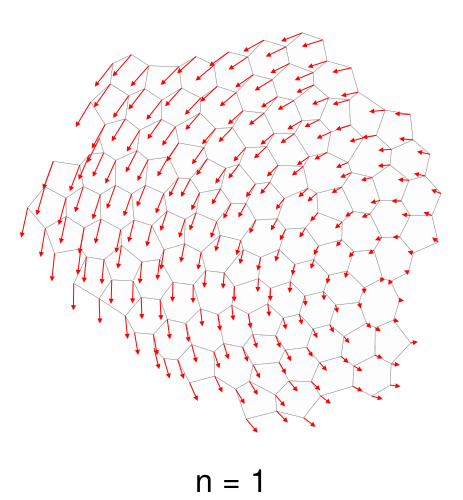

In [62]:
cellPolygons = makeCellPolygons(R,params,matrices)
        #Aevlims=(-maximum(abs.(MevH[nCells+1:end, :])), maximum(abs.(MevH[nCells+1:end, :])))
        Aevlims=(-1,1)

        set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
        fig = Figure(resolution=(1500,500))

        a1=Axis(fig[1,1],aspect=DataAspect())
        hidedecorations!(a1)
        hidespines!(a1)

        for i=1:nCells
            poly!(a1,cellPolygons[i],color=[MevH[1:nCells,1][i]],colormap=:bwr,colorrange=Aevlims, strokecolor=(:grey,1.0),strokewidth=0.5)
        end

        colsize!(fig.layout,1,Aspect(1,1.0))
        Label(fig[1,1,Bottom()],"n = "*string(1),fontsize = 32)
        resize_to_layout!(fig)
        #arrows!(a1, Point2f.(R),Vec2f.(reinterpret(SVector{2,Float64},evecHE[:,1])), color=:blue, arrowsize=7, lengthscale=0.2*L₀/γ)
        arrows!(a1, Point2f.(R),Vec2f.(reinterpret(SVector{2,Float64},evecHE[:,2]+evecHE[:,3]+evecHE[:,1])), color=:red, arrowsize=7, lengthscale=0.2*L₀/γ)

        #arrows!(a1, Point2f.(R),Vec2f.(reinterpret(SVector{2,Float64},)), color=:red, arrowsize=7, lengthscale=0.2*L₀/γ)
       # arrows!(a1, Point2f.(R),Vec2f.(reinterpret(SVector{2,Float64},evecHE[:,3])), color=:green, arrowsize=7, lengthscale=0.2*L₀/γ)


        #save(datadir(plot_dir,"abs_scalemode_$(@sprintf("%03d", n))_Perimeter.png"),fig)
    
fig

In [259]:
(1.0./evalH)[4:end]

453-element Vector{Float64}:
 0.879510514999103
 0.7168702844695963
 0.6616582981479713
 0.6492675002093564
 0.4225769217985307
 0.35240437879100045
 0.3254545007751533
 0.28211256682005076
 0.25906260132342607
 0.23150780509834146
 ⋮
 0.0028129371898702555
 0.002689031140447024
 0.0026697962324855155
 0.0026179557227279044
 0.0023659887664857766
 0.0014956094383685005
 0.0010980524262285156
 0.0010006651303192463
 0.0009608272604918294

In [255]:
[1, 10, 60, 600, 3600, 36000]./20

6-element Vector{Float64}:
    0.05
    0.5
    3.0
   30.0
  180.0
 1800.0

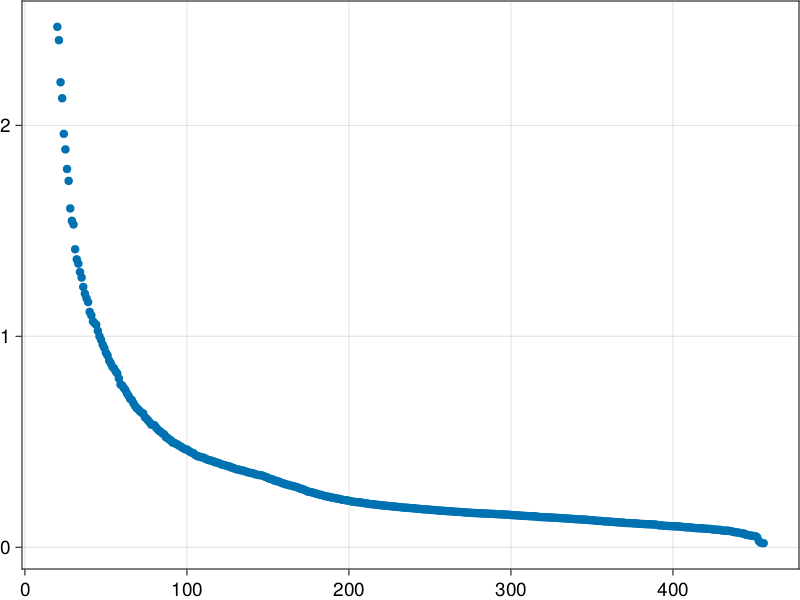

In [254]:
scatter(nv[20:end],1.0./((evalH./20))[20:end])

In [87]:

evalEgX,evecEgXtemp=LAPACK.syev!('V','U',deepcopy(sqrt(Eflat)*Matrix(mortar(inv(E)*gX))*inv(sqrt(Eflat))))
evecEgX=inv(sqrt(Eflat))*evecHtemp

588×588 Matrix{Float64}:
  0.355028    -0.32485       0.000532182  …  -0.0779893    -0.122314
  0.230597    -0.000532032  -0.32485         -0.186238     -0.291942
  0.0443776   -0.32485       0.000532042     -0.00880199   -0.026892
 -0.384328    -0.000532005  -0.324851        -0.00939091   -0.0289182
  0.443784    -0.32485       0.000532222      0.00224935    0.000224255
 -7.68632e-7  -0.000532022  -0.32485      …   0.04745       0.054302
 -0.0443779   -0.32485       0.000532002      1.15888e-5   -1.48534e-5
  0.230597    -0.000532032  -0.32485          8.70524e-6   -1.10267e-5
  0.377216    -0.32485       0.000532192      0.0179622     0.0176238
 -0.0384335   -0.00053202   -0.32485          0.000750811   0.000622652
  ⋮                                       ⋱                
  0.0768655   -0.000532025  -0.32485          7.42486e-8    7.35828e-8
  0.355027    -0.32485       0.000532182  …  -0.000350519  -3.49169e-5
 -6.18789e-7  -0.000532022  -0.32485          0.00422647    0.00483697


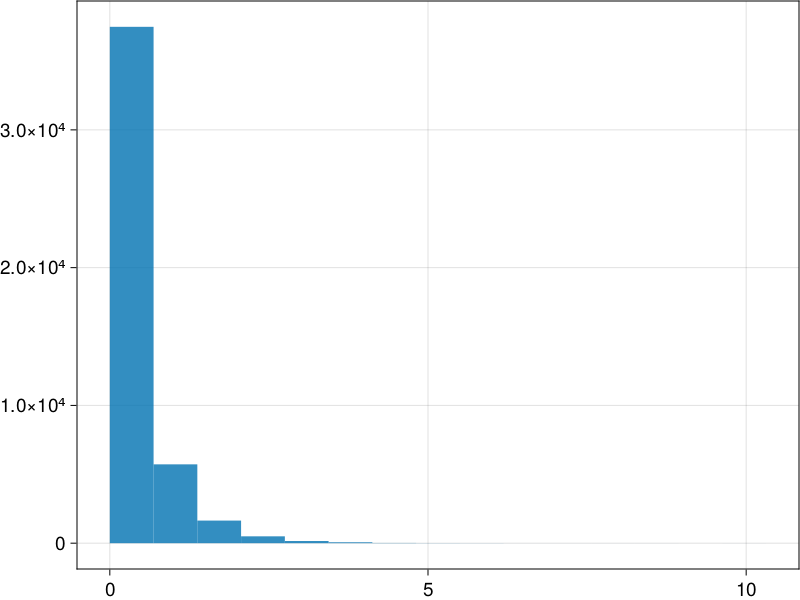

In [159]:
hist(abs.(reduce(vcat,MevH[nCells+1: end,:])), normalize=:true)

In [49]:
Matrix(M*sparse(I, nVerts, nVerts))

MethodError: MethodError: no method matching zero(::Type{Adjoint{Float64, SVector{2, Float64}}})

Closest candidates are:
  zero(!Matched::Union{Type{P}, P}) where P<:Dates.Period
   @ Dates C:\Users\v35431nc\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\Dates\src\periods.jl:51
  zero(!Matched::UniformScaling{T}) where T
   @ LinearAlgebra C:\Users\v35431nc\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\uniformscaling.jl:135
  zero(!Matched::FixedPointNumbers.FixedPoint)
   @ FixedPointNumbers C:\Users\v35431nc\.julia\packages\FixedPointNumbers\HAGk2\src\FixedPointNumbers.jl:222
  ...


In [ ]:
lambda_s_alpha_Sigma=zeros(2*nVerts)
lambda_s_alpha_gX=zeros(2*nVerts)
lambda_s_beta_gX=zeros(2*nVerts)
for s in 1:2*nVerts
    for p in 1:2*nCells
        lambda_s_alpha_Sigma[s] += (sNF[p])^2*evecDDs[p,s]^2
    end
end

for s in 1:2*nVerts
    for p in 2:2*nCells
        for q in 2:2*nCells
            lambda_s_alpha_gX[s] += evecDDs[p, s]*Ds[p,q]*evecDDs[q,s]
        end
    end
end

for s in 1:2*nVerts
    for p in 2*nCells+1:2*nVerts
        for q in 2*nCells+1:2*nVerts
            lambda_s_beta_gX[s] += evecDDs[p, s]*Ds[p,q]*evecDDs[q,s]
        end
    end
end




In [32]:
nv=LinRange(1, 2*nVerts, 2*nVerts)
nc=LinRange(2*nVerts-2*nCells+1, 2*nVerts, 2*nCells)
nD=LinRange(2*nVerts-2*nCells, 2*nVerts, 2*nCells-1)
fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="log₁₀λₙ",yscale=log10, title="Γ = "*string(params.γ)*", L₀ = "*string(params.L₀))


scatter!(ax,nv, (abs.(evalH)), color=:black,markersize=4, label=L"\lambda_n,\quad \mathcal{H}")
#scatter!(ax,nv, lambda_s_beta_gX, color=:red,markersize=4, label="qₙᵀE⋅(Σ²+Zᵀ⋅gᵀX⋅Z)⋅qₙ")
scatter!(ax,nv, abs.([evecDD[:,x]'*(evecLv'*Matrix(mortar(gX))*evecLv)*evecDD[:,x] for x in 1:2nVerts]), color=:orange,markersize=4, label="αₙᵀ⋅(D)⋅αₙ + βₙᵀ⋅(D)⋅βₙ ")#
scatter!(ax,nv, abs.([evecDD[:,x]'*(Diagonal(vcat(zeros(2*nVerts-2*nCells),reverse(sNF.^2))))*evecDD[:,x] for x in 1:2nVerts]), color=:green,markersize=4, label="αₙᵀ⋅(Σ²)⋅αₙ")#
scatter!(ax,nv, ((evalDD)), color=:blue,markersize=4, label=L"\lambda_n,\quad \mathcal{L}_v^G")
#scatter!(ax,nv,lambda_s_alpha_gX, color=:pink,markersize=4, label="αₙᵀ⋅(Zᵀ⋅gᵀX⋅Z)⋅αₙ + βₙᵀ⋅(Zᵀ⋅gᵀX⋅Z)⋅βₙ")

#scatter!(ax,nv,log10.(abs.(test)), color=:orange,markersize=4, label="σ²ₙ+ZₙE.gX.Zₙ")#
#vlines!(ax,2*nVerts+1/2-((2*nCells)), color=:red)

#vlines!(ax,2*nVerts+1/2-((nCells)), color=:red)

fig[1, 2] = Legend(fig, ax, framevisible = false)
# elem_1 = [MarkerElement(color = :black, marker = :circle, markersize = 10)]

# elem_2 = [MarkerElement(color = :blue, marker = :circle, markersize = 10)]
# Legend(fig[1, 2],
#     [elem_1, elem_2],
#     ["no peripheral vertices", "peripheral vertices"],
#     patchsize = (35, 35), rowgap = 10)
#fig[1, 2] = Legend(fig, ax, framevisible = false)
#save(datadir(f,"eigenmodes","map_spectra_split_log_Γ_"*string(params.γ)*"_L0_"*string(params.L₀)*".png"),fig)
fig

In [11]:
evmapgX

588-element Vector{Float64}:
   1.2263823334445154e-15
  -8.4644593144971e-15
  -1.1325857339456491e-14
   1.0894722908089451
   1.0894722908106622
   0.9516759474322831
   0.9516759474389294
   2.3204849673977406
  -0.9945222560257555
   2.5051950327681314
   ⋮
 248.2438889752195
 248.24388897542275
 248.45967883358847
 271.6750034480274
 271.6774827795775
 271.6774827795848
 271.68243423139995
 271.68243423141087
 271.684906362551

In [15]:
evmapLv

588-element Vector{Float64}:
 -1.0097999910389415e-16
  6.172426960176604e-16
 -8.840323492213292e-16
  0.013316118941066098
  0.013316118940781729
  0.46063909993608326
  0.46063909993618435
  0.1152940268552491
  3.5983309162317374
  0.19057739622907693
  ⋮
  1.7804438605516495
  1.7804438604602246
  1.7522071787311382
  0.02355891171474488
  0.023762064977936637
  0.02376206497859308
  0.02416756584634184
  0.024167565845291592
  0.024369915121932005

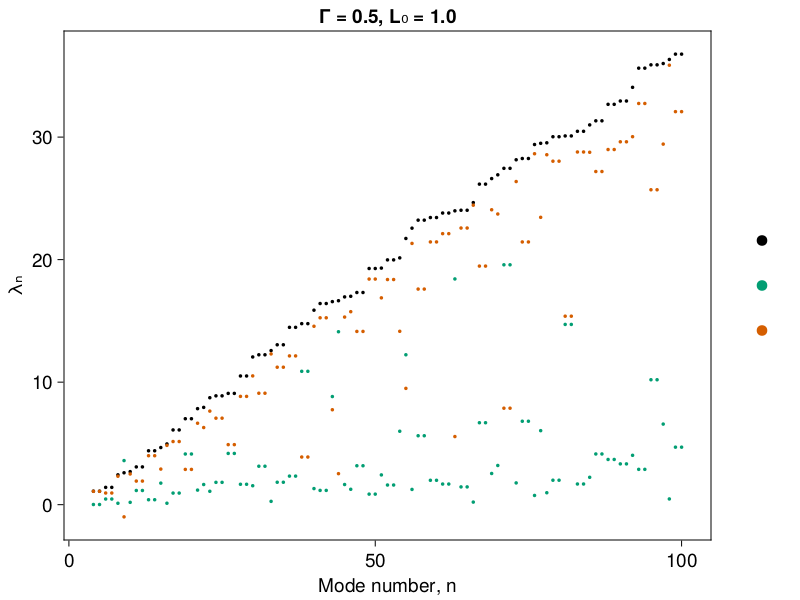

In [86]:
perm=sortperm((abs.(evalH)))
nv=LinRange(1, 2*nVerts, 2*nVerts)
nc=LinRange(2*nVerts-2*nCells+1, 2*nVerts, 2*nCells)
fig = Figure()
set_theme!(figure_padding=5, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
ax=Axis(fig[1, 1], xlabel="Mode number, n", ylabel="λₙ", title="Γ = "*string(params.γ)*", L₀ = "*string(params.L₀))
hidedecorations!(ax, grid=true, ticks=false, label=false,ticklabels = false)
#vspan!(197.5, 396.5, color = (:grey, 0.3))
scatter!(ax,nv[4:100], ((abs.(evalH[perm])))[4:100], color=:black,markersize=5, label=L"\lambda_n,\, \mathcal{H}")

#scatter!(ax,nv, (sort(abs.(evalLv))), color=ColorSchemes.seaborn_colorblind6[1],markersize=4, label=L"\lambda_n,\, \mathcal{L}_v^G")


scatter!(ax,nv[4:100], (((evmapLv[perm])))[4:100], color=ColorSchemes.seaborn_colorblind6[2],markersize=5, label=L"\lambda_n,\, \mathcal{L}_v^G")
scatter!(ax,nv[4:100], (((evmapgX[perm])))[4:100], color=ColorSchemes.seaborn_colorblind6[3],markersize=5, label=L"\lambda_n,\, \mathcal{H}")




elem_1 = [MarkerElement(color = :black, marker = :circle, markersize = 15)]

elem_2 = [MarkerElement(color = ColorSchemes.seaborn_colorblind6[2], marker = :circle, markersize = 15)]

elem_3 = [MarkerElement(color =ColorSchemes.seaborn_colorblind6[3], marker = :circle, markersize = 15)]

# # elem_4 = [MarkerElement(color =ColorSchemes.seaborn_colorblind6[3], marker = :circle, markersize = 12)]
Legend(fig[1, 2],#
    [elem_1, elem_2, elem_3],
    ["","",""],
    patchsize = (35, 35), rowgap = 10, framevisible = false)
resize_to_layout!(fig)

#ylims!(low=0.005)

#fig[1, 2] = Legend(fig, ax, framevisible = false)
#save(datadir(f,"eigenmodes","Mode_contributions_Γ_"*string(params.γ)*"_L0_"*string(params.L₀)*"zoom.png"),fig)
fig

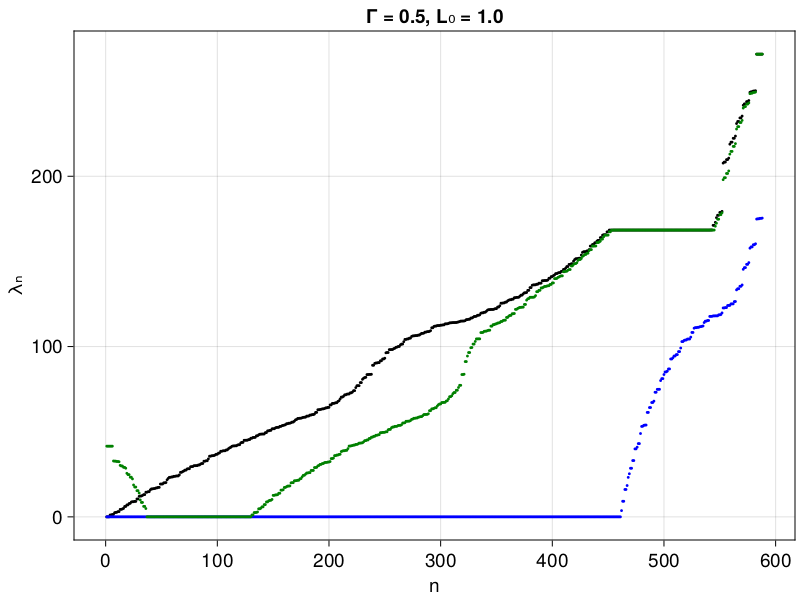

In [96]:
nv=LinRange(1, 2*nVerts, 2*nVerts)
nc=LinRange(2*nVerts-2*nCells+1, 2*nVerts, 2*nCells)
nc2=LinRange(1, 2*nCells, 2*nCells)
nD=LinRange(2*nVerts-2*nCells, 2*nVerts, 2*nCells-1)
fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="λₙ", title="Γ = "*string(params.γ)*", L₀ = "*string(params.L₀))

scatter!(ax,nv[1:end], (sort(abs.(evalH)))[1:end], color=:black,markersize=4, label=L"\lambda_n,\quad \mathcal{H}")
scatter!(ax,nv, ((abs.(evalLv))), color=:blue,markersize=4, label=L"\lambda_n,\quad \mathcal{L}_v^G")
#scatter!(ax,nc, ((abs.(reverse(sNF.^2)))), color=:red,markersize=4, label="σ²ₙ, N")
scatter!(ax,nv, ((abs.(evalEgX))), color=:green,markersize=4, label=L"\lambda_, \quad EgX")
#scatter!(ax,nc, log10.(sort(abs.(evalLc))), color=:red,markersize=4, label=L"\lambda_n,\quad \mathcal{L}_c^G")


#scatter!(ax,nv, (log10.((abs.([evecDD[:,x]'*Eflat*(evecLv'*Matrix(mortar(gX))*evecLv)*evecDD[:,x] for x in 1:2nVerts])))), color=:orange,markersize=4, label="qₙᵀE⋅(Zᵀ⋅gᵀX⋅Z)⋅qₙ")#
#scatter!(ax,nv, (log10.((abs.([evecDD[:,x]'*Eflat*(Diagonal(vcat(zeros(2*nVerts-2*nCells),reverse(sNF.^2))))*evecDD[:,x] for x in 1:2nVerts])))), color=:green,markersize=4, label="qₙᵀE⋅(Σ²)⋅qₙ")#
#scatter!(ax,nv, (log10.((abs.([evecDDs[:,x]'*Eflat*(Z[:, end:-1:1]'*Matrix(mortar(gX))*Z[:, end:-1:1])*evecDDs[:,x] for x in 1:2nVerts])))), color=:orange,markersize=4, label="qₙᵀE⋅(Zᵀ⋅gᵀX⋅Z)⋅qₙ")#
#scatter!(ax,nv, (log10.((abs.([evecDDs[:,x]'*Eflat*(Diagonal(vcat( zeros(2*nVerts-2*nCells),reverse(sNF.^2))))*evecDDs[:,x] for x in 1:2nVerts])))), color=:green,markersize=4, label="qₙᵀE⋅(Σ²)⋅qₙ")#

#scatter!(ax,nv, (log10.(sort(abs.(evecmap)))), color=:orange,markersize=4, label="λₙ, D+diag(σ²ₙ)")#
#scatter!(ax,nv[1:2*nVerts-2*nCells], (log10.((abs.(evecmap)[1:2*nVerts-2*nCells]))), color=:green,markersize=4, label="ZₙE.gX.Zₙ")
#scatter!(ax,nc,log10.(reverse(sMH.^2)), color=:pink,markersize=4, label="σ²ₙ, MH")#


#scatter!(ax,nv[1:2*nVerts-2*nCells], (log10.((abs.(testLv[1:2*nVerts-2*nCells])))), color=:green,markersize=4, label="ZₙE.gX.Zₙ")
#scatter!(ax,nv[2*nVerts+1-2*nCells:end],(log10.((abs.((testLv)[2*nVerts+1-2*nCells:end])))), color=:pink,markersize=4, label="σ²ₙ+ZₙE.gX.Zₙ, sorted")

#scatter!(ax,nv,abs.(evalDD), color=:orange,markersize=4, label="σ²ₙ+ZₙE.gX.Zₙ")#


#vlines!(ax,2*nVerts+1/2-((2*nCells)), color=:red)

#vlines!(ax,2*nVerts+19-((nCells)), color=:red)
#ylims!(low = 1)
#fig[1, 2] = Legend(fig, ax, framevisible = false)
#save(datadir(f,"eigenmodes","compare_spectra_log_Γ_"*string(params.γ)*"_L0_"*string(params.L₀)*"_zoom.png"),fig)
fig

In [99]:
1.0./evalH

588-element Vector{Float64}:
 -1.0085259323984342e7
 -2.5836733725732495e12
  4.889304473574706e12
  0.9067923708552322
  0.9067922683279376
  0.7080573735378276
  0.7080571305123531
  0.41054634452189687
  0.3840527762354694
  0.3709511848630975
  ⋮
  0.003999611455163653
  0.0039996109948652984
  0.003996613275422015
  0.0036805439458851004
  0.0036805101328662025
  0.0036805036526737357
  0.003680437311107363
  0.0036804315577402217
  0.0036803973325152486

In [12]:
evalDD

456-element Vector{Float64}:
   -3.0743370797910253e-13
   -1.099425426459518e-13
    2.847538971578693e-14
    1.1369960710485996
    1.3949525062819637
    1.5113541276503748
    1.540197221757655
    2.3664330644081377
    2.8376491899184577
    3.0726261201434424
    ⋮
  355.5002947101434
  371.88115264212195
  374.5604206913657
  381.9774304501984
  422.65627553477685
  668.623755872294
  910.703329015631
  999.3353117850377
 1040.7698044371866

In [1036]:
mkpath(datadir(f,"eigenmodes", "spectra"))

for n=1:2*nVerts


    nv=LinRange(1, 2*nVerts, 2*nVerts)

    fig = Figure()
    ax=Axis(fig[1, 1],xlabel="n", ylabel="qₚₙ²Eₙ", title="n = "*string(n)*", Γ = "*string(params.γ)*", L₀ = "*string(params.L₀))

    scatter!(ax,nc,(((((evecDD[:,n].^2).*diag(Eflat))[2*nVerts-(2*nCells)+1:end]))), color=:black,markersize=4)
    vlines!(ax,2*nVerts+1/2-((2*nCells)), color=:red)

    vlines!(ax,2*nVerts+1/2-((nCells)), color=:red)


    #hidedecorations!(ax22)
    #hidespines!(ax22)

    #colsize!(fig.layout,1,Aspect(1,1.0))


    #Label( fig[0,:],"n = "*string(n)*"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀)*", δL = "*string(params.δL),fontsize = 32, color = (:black, 1))
    #resize_to_layout!(fig)
    save(datadir(f,"eigenmodes", "spectra","spectramap_lambda_$(@sprintf("%03d", n)).png"),fig)

    #display(fig)
end


In [37]:
evecH*evecH

456×456 Matrix{Float64}:
  2.54136     -1.74796    -2.72072   …  -7.46782   -1.46708   -0.971828
  1.15508     -1.09256     1.02853       1.14375    1.69899    3.0074
 -0.779569     0.795144    0.790426     -4.05182   -1.62357   -2.71877
  0.263196    -0.550195   -1.40867       0.872645  -2.89854   -5.99155
 -0.461298     0.255803    3.54253      12.656     -2.47351    8.36465
  0.0224646   -0.115368    1.98766   …  -2.21949    4.59444    8.97534
 -0.891482     0.521227    1.08817       0.997747  -4.50508    1.62426
  0.350638     0.867486   -2.28945      -1.32529   -2.42964   -0.194184
  4.00141      2.35921     0.662759      1.78227    5.14674   -0.0519438
  0.160425     0.135987    0.102551     -0.51954   -0.34188   -2.19324
  ⋮                                  ⋱                         ⋮
  2.67328     -1.26958    -0.474171      0.604769  -3.4052    -1.69141
 -0.350832    -0.0445517  -1.26885      -0.141005  -0.168772   1.3269
  1.39381     -0.733233   -0.833442      2.96929    1.51

In [13]:
nv=LinRange(1, 2*nVerts, 2*nVerts)
nc=LinRange(2*nVerts-2*nCells+1, 2*nVerts, 2*nCells)
nD=LinRange(2*nVerts-2*nCells, 2*nVerts, 2*nCells-1)
fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel=string(L"|ΔU_{Area}/ΔU_{Perimeter}|"), title="Area Energy, Perimeter energy, H, Γ = "*string(params.γ)*", L₀ = "*string(params.L₀))

#scatter!(ax,nv, ((ones(100)'*zMH[1:100,:])'), color=:black,markersize=4, label="ΔU")
#scatter!(ax,nv, (ones(100)'*(Mflat*(evecDD'*evecH*evecDD)))', color=:blue,markersize=4, label="ΔU")

scatter!(ax,nv[1:end-2], (((g'*MevH)'))[1:end-2], color=:black,markersize=4, label="MH")
#scatter!(ax,nc[2:end], (((((g'*MevLvnorm)')[2*nVerts-2*nCells+2:end]))), color=:blue,markersize=4, label="MLv")
#scatter!(ax,nv, sum(Mflat*evecH, dims=1)', color=:black,markersize=4, label="Lc")
#scatter!(ax,nv, (g[1:100]'*(Mflat*(evecH))[1:100,:])', color=:red,markersize=4, label="ΔArea")
#scatter!(ax,nv, (g[101:end]'*(Mflat*(evecH))[101:end,:])', color=:blue,markersize=4, label="ΔPerimeter")
#scatter!(ax,nc,abs.(( (cellPressures'*evecLc[1:100,:])')./(-cellTensions'*evecLc[101:end,:])'), color=:black,markersize=4, label="Lc")
#scatter!(ax,nv, (abs.(( (cellPressures'*MevH[1:100,:])')./(-cellTensions'*MevH[101:end,:])')), color=:black,markersize=4, label="H")
#scatter!(ax, nc,sort(log10.(abs.((g'*inv(sqrt(G))*Matrix(qr(MevH[:, 2*nVerts-2*nCells+1:end]).Q))'))), color=:orange,markersize=4, label="ΔU")
#scatter!(ax,nv,((abs.((( (ones(100)'*MevH[101:end,:])').^2)./((ones(100)'*MevH[1:100,:])')))), color=:orange,markersize=4, label="ΔU")


#hlines!(ax,0.5*g'*(vcat(cellAreas.-1, cellPerimeters.-1)) )
#hlines!(ax, g'*(vcat(cellAreas.-1, cellPerimeters.-1)))

vlines!(ax,2*nVerts-((2*nCells))+1/2, color=:red)

vlines!(ax,2*nVerts-((nCells)+1/2), color=:red)
fig[1, 2] = Legend(fig, ax, framevisible = false)
#save(datadir(f,"eigenmodes","Ratio_Area_Perimeter_energy_H_Γ_"*string(params.γ)*"_L0_"*string(params.L₀)*".png"),fig)
fig

UndefVarError: UndefVarError: `MevH` not defined

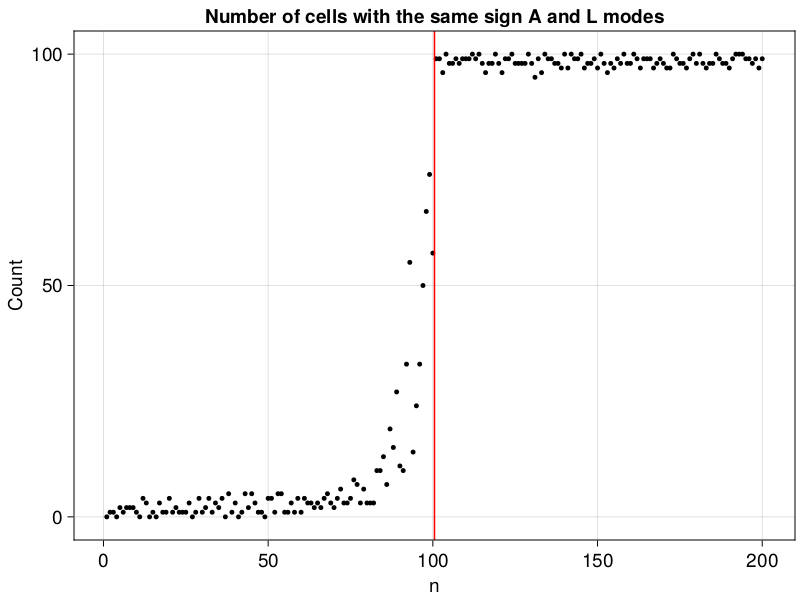

In [46]:
modeSign=zeros(2*nCells)
mode_mag_plus=zeros(2*nCells)
mode_mag_minus=zeros(2*nCells)
mode_magL_plus=zeros(2*nCells)
mode_magL_minus=zeros(2*nCells)
mode_magA_plus=zeros(2*nCells)
mode_magA_minus=zeros(2*nCells)
for n=1:2*nCells
    a=evecLc[1:nCells,n].*evecLc[nCells+1:end,n]
    bA=evecLc[1:nCells,n]
    bL=evecLc[nCells+1:end,n]
    modeSign[n]=length(a[a.>0])
    mode_mag_plus[n]=sum(a[a.>0])
    mode_mag_minus[n]=sum(a[a.<0])
    mode_magL_plus[n]=sum(bL[a.>0])
    mode_magL_minus[n]=sum(bL[a.<0])
    mode_magA_plus[n]=sum(bA[a.>0])
    mode_magA_minus[n]=sum(bA[a.<0])
end
n=LinRange(1, 2*nCells, 2*nCells)
fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="Count", title="Number of cells with the same sign A and L modes")

#scatter!(ax,n, mode_magL_plus, color=:red, label="Σ L modes, same sign", markersize=7)
scatter!(ax,n, modeSign, color=:black, label="Σ L modes, opposite", markersize=7)
# scatter!(ax,n, mode_magA_plus.+ mode_magL_plus, color=:red, label="Σ same sign", markersize=7)
# scatter!(ax,n, mode_magA_minus.+ mode_magL_minus, color=:blue, label="Σ opposite sign", markersize=7)

#vlines!(ax,2*nVerts-(2*nCells) +0.5, color=:red)
vlines!(ax,nCells+0.5, color=:red)
#fig[1, 2] = Legend(fig, ax, framevisible = false)
save(datadir(f,"eigenmodes","mode_sign.png"),fig)
fig

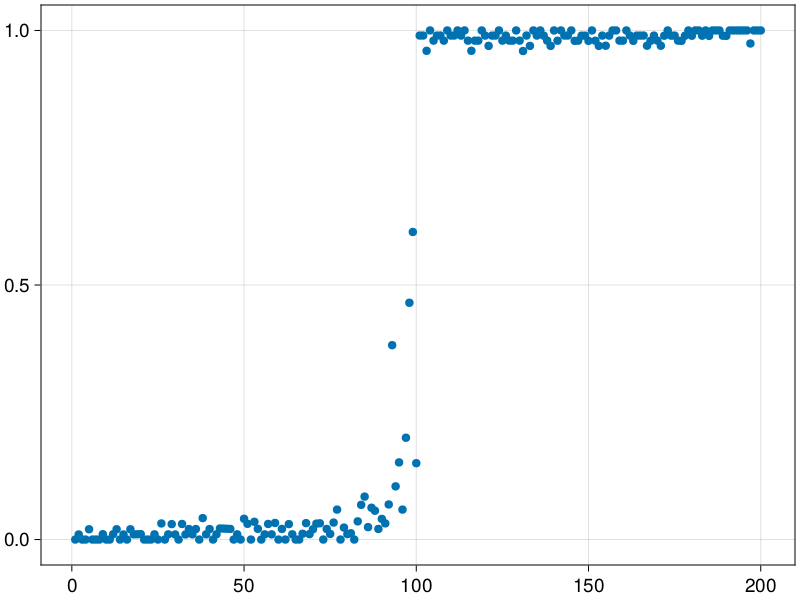

In [80]:
a=evecLc[1:nCells,:].*evecLc[nCells+1:end,:]

#length(a[(abs.(a).>1e-8).&&(a.>0)])/length(a[(abs.(a).>1e-8)])
ms=[length(a[:,n][(abs.(a[:,n]).>1e-6).&&(a[:,n].>0)])/length(a[:,n][(abs.(a[:,n]).>1e-6)]) for n in 1:size(a)[2]]

scatter(LinRange(1, 2*nCells, 2*nCells), ms)

In [35]:
writedlm(datadir(f,"eigenmodes","LcE_eigenvalues.csv"), evalLc, ',') 
writedlm(datadir(f,"eigenmodes","LcE_eigenvectors.csv"), evecLc, ',') 
writedlm(datadir(f,"eigenmodes","LvE_eigenvalues.csv"), evalLv, ',') 
writedlm(datadir(f,"eigenmodes","LvE_eigenvectors.csv"), evecLv, ',') 
writedlm(datadir(f,"eigenmodes","HE_eigenvalues.csv"), evalH, ',') 
writedlm(datadir(f,"eigenmodes","HE_eigenvectors.csv"), evecH, ',') 
writedlm(datadir(f,"eigenmodes","DppE_tot_diag_sigma_eigenvalues.csv"), evalDD, ',') 
writedlm(datadir(f,"eigenmodes","DppE_tot_diag_sigma_eigenvectors.csv"), evecDD, ',') 
writedlm(datadir(f,"eigenmodes","svd_N_Y.csv"), Y, ',') 
writedlm(datadir(f,"eigenmodes","svd_N_Z.csv"), Z, ',') 
writedlm(datadir(f,"eigenmodes","svd_N_sigma.csv"), sNF, ',') 

writedlm(datadir(f,"eigenmodes","evmap.csv"), evecmap, ',') 
writedlm(datadir(f,"eigenmodes","evmapLv.csv"), evmapLv, ',') 
writedlm(datadir(f,"eigenmodes","evmapgX.csv"), evmapgX, ',') 

writedlm(datadir(f,"eigenmodes","MevecH.csv"), MevH, ',') 

In [ ]:
writedlm(datadir(f,"eigenmodes","LvE.csv"), Matrix(mortar(LvE)), ',') 
writedlm(datadir(f,"eigenmodes","gX.csv"), Matrix(mortar(gX)), ',') 


writedlm(datadir(f,"eigenmodes","HE.csv"), HE, ',') 
writedlm(datadir(f,"eigenmodes","E.csv"), E, ',') 

writedlm(datadir(f,"eigenmodes","LcE.csv"), LcE*G, ',') 

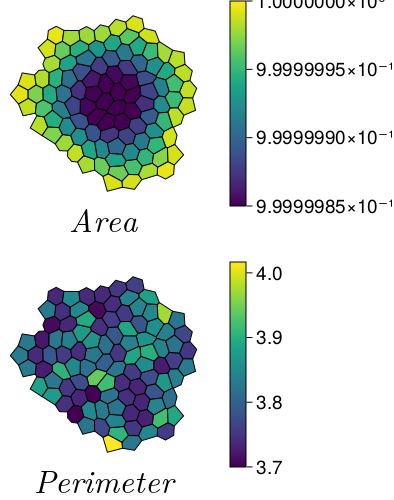

In [1370]:
cellPolygons = makeCellPolygons(R,params,matrices)
Aevlims=(minimum(abs.(cellAreas[1:nCells])), maximum(abs.(cellAreas[1:nCells])))
Levlims=(minimum(abs.(cellPerimeters[1:nCells])), maximum(abs.(cellPerimeters[1:nCells])))
set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
fig = Figure(resolution=(1500,500))

a1=Axis(fig[1,1],aspect=DataAspect())
a2=Axis(fig[2,1],aspect=DataAspect())
hidedecorations!(a1)
hidespines!(a1)
hidedecorations!(a2)
hidespines!(a2)
for i=1:nCells
    poly!(a1,cellPolygons[i],color=cellAreas[i],colormap=:viridis,colorrange=Aevlims, strokecolor=(:black,1.0),strokewidth=1)
    poly!(a2,cellPolygons[i],color=cellPerimeters[i],colormap=:viridis,colorrange=Levlims, strokecolor=(:black,1.0),strokewidth=1)
end
#Label(fig[2,1,Bottom()],"λ_"*string(n)*" = "*@sprintf("%.5E", evals[n]),fontsize = 32)

#hidedecorations!(ax22)
#hidespines!(ax22)

colsize!(fig.layout,1,Aspect(1,1.0))


Colorbar(fig[1,2],limits=colorrange=Aevlims,colormap=:viridis,flipaxis=true)
Colorbar(fig[2,2],limits=colorrange=Levlims,colormap=:viridis,flipaxis=true)


Label(fig[1,1,Bottom()],string(L"Area"),fontsize = 32, rotation=0)
Label(fig[2,1,Bottom()],string(L"Perimeter"),fontsize = 32, rotation=0)
#Label( fig[0,:],"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀)*", δL = "*string(params.δL),fontsize = 32, color = (:black, 1))
resize_to_layout!(fig)
save(datadir(f,"eigenmodes","Area_Perimeter.png"),fig)
fig

In [ ]:
cellAreas

In [1371]:
Peff=getPeff(params, matrices)
cellQ, cellJ=makeCellQandJ(params, matrices)
cellShearStress=getShearStress(params, matrices, cellJ)

cellPolygons = makeCellPolygons(R,params,matrices)
@unpack cellAreas, cellPerimeters, cellPressures, cellTensions = matrices
Plims=(minimum(cellPressures[1:nCells]), maximum(cellPressures[1:nCells]))
Tlims=(minimum(-cellTensions[1:nCells]), maximum(-cellTensions[1:nCells]))
Pefflims=(-maximum(abs.(Peff)), maximum(abs.(Peff)))
ShStlims=(minimum(cellShearStress[1:nCells]), maximum(cellShearStress[1:nCells]))
set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
fig = Figure(resolution=(1500,500))

a11=Axis(fig[1,1],aspect=DataAspect())
a21=Axis(fig[2,1],aspect=DataAspect())
a13=Axis(fig[1,3],aspect=DataAspect())
a23=Axis(fig[2,3],aspect=DataAspect())
hidedecorations!(a11)
hidespines!(a11)
hidedecorations!(a21)
hidespines!(a21)
hidedecorations!(a13)
hidespines!(a13)
hidedecorations!(a23)
hidespines!(a23)
for i=1:nCells
    poly!(a11,cellPolygons[i],color=cellPressures[i],colormap=cgrad(:Blues_9, rev=true),colorrange=Plims, strokecolor=(:black,1.0),strokewidth=1)
    poly!(a21,cellPolygons[i],color=-cellTensions[i],colormap=:plasma,colorrange=Tlims, strokecolor=(:black,1.0),strokewidth=1)
    poly!(a13,cellPolygons[i],color=Peff[i],colormap=:bwr,colorrange=Pefflims, strokecolor=(:black,1.0),strokewidth=1)
    poly!(a23,cellPolygons[i],color=cellShearStress[i],colormap=:plasma,colorrange=ShStlims, strokecolor=(:black,1.0),strokewidth=1)
end
#Label(fig[2,1,Bottom()],"λ_"*string(n)*" = "*@sprintf("%.5E", evals[n]),fontsize = 32)

#hidedecorations!(ax22)
#hidespines!(ax22)

colsize!(fig.layout,1,Aspect(1,1.0))

colsize!(fig.layout,3,Aspect(1,1.0))


Colorbar(fig[1,2],limits=colorrange=Plims,colormap=cgrad(:Blues_9, rev=true),flipaxis=true)
Colorbar(fig[2,2],limits=colorrange=Tlims,colormap=:plasma,flipaxis=true)
Colorbar(fig[1,4],limits=colorrange=Pefflims,colormap=:bwr,flipaxis=true)
Colorbar(fig[2,4],limits=colorrange=ShStlims,colormap=:plasma,flipaxis=true)

Label(fig[1,1,Bottom()],"Pressure",fontsize = 32, rotation=0)
Label(fig[2,1,Bottom()],"Tension",fontsize = 32, rotation=0)

Label(fig[1,3,Bottom()],"Effective Pressure",fontsize = 32, rotation=0)
Label(fig[2,3,Bottom()],"Shear Stress",fontsize = 32, rotation=0)
Label( fig[0,:],"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀),fontsize = 32, color = (:black, 1))
resize_to_layout!(fig)
#save(datadir(f,"eigenmodes","Stress.png"),fig)
save(datadir(f,"eigenmodes","stress_pressure_Γ_"*string(params.γ)*"_L0_"*string(params.L₀)*".png"),fig)

display(fig)

ErrorException: Can't interpolate in a range where cmin == cmax. This can happen, for example, if a colorrange is set automatically but there's only one unique value present.

In [49]:
Point(R[1])

2-element Point2{Float64} with indices SOneTo(2):
  0.9516352486037881
 -2.068177860634148

In [200]:
cellPolygons = makeCellPolygons(R,params,matrices)

for n=1:2*nCells

    Aevlims=(-maximum(abs.(Y[1:nCells,n])), maximum(abs.(Y[1:nCells, n])))
    Levlims=(-maximum(abs.(Y[ nCells+1:2*nCells,n])), maximum(abs.(Y[nCells+1:2*nCells, n])))
    set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
    fig = Figure(resolution=(1500,500))

    a1=Axis(fig[1,1],aspect=DataAspect())
    a2=Axis(fig[2,1],aspect=DataAspect())
    hidedecorations!(a1)
    hidespines!(a1)
    hidedecorations!(a2)
    hidespines!(a2)
    for i=1:nCells
        poly!(a1,cellPolygons[i],color=[Y[1:nCells,n][i]],colormap=:bwr,colorrange=Aevlims, strokecolor=(:black,1.0),strokewidth=1)
        poly!(a2,cellPolygons[i],color=[Y[nCells+1:2*nCells,n][i]],colormap=:bwr,colorrange=Levlims, strokecolor=(:black,1.0),strokewidth=1)
    end
    Label(fig[2,1,Bottom()],"λ_"*string(2*nCells-(n-1))*" = "*@sprintf("%.5E", sNF[n]^2),fontsize = 32)

    #hidedecorations!(ax22)
    #hidespines!(ax22)

    colsize!(fig.layout,1,Aspect(1,1.0))


    Colorbar(fig[1,2],limits=colorrange=Aevlims,colormap=:bwr,flipaxis=true)
    Colorbar(fig[2,2],limits=colorrange=Levlims,colormap=:bwr,flipaxis=true)


    Label(fig[1,1,Left()],string(L"Area"),fontsize = 32, rotation=π/2)
    Label(fig[2,1,Left()],string(L"Perimeter"),fontsize = 32, rotation=π/2)
    #Label( fig[0,:],"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀)*", δL = "*string(params.δL),fontsize = 32, color = (:black, 1))
    resize_to_layout!(fig)
    save(datadir(f,"eigenmodes","eigenmodes_Y$(@sprintf("%03d", 2*nCells-(n-1))).png"),fig)

    #display(fig)
end




In [ ]:
sum(cellAreas.*(log.(cellAreas).-1)+(γ*L₀).*cellPerimeters.*(log.(cellPerimeters./L₀).-1))

In [ ]:
(γ*L₀).*cellPerimeters.*(log.(cellPerimeters./L₀).-1)

In [1373]:
cellPressures

100-element Vector{Float64}:
 -7.851316183595374e-9
 -3.51866302290451e-8
 -1.1082833576618344e-7
 -1.9055964778792566e-7
 -2.0094508122464633e-7
 -1.8469516822918258e-7
 -1.545523033524667e-7
 -9.223234157654157e-8
 -1.588469102213481e-8
 -2.1181191469711077e-8
  ⋮
 -7.05453307340076e-8
 -1.8299543381520866e-8
 -1.4330940484231313e-7
 -5.996346621386599e-8
 -2.2232012034213405e-8
 -5.440649900944694e-8
 -1.425492079392561e-7
 -3.391568883297205e-8
 -1.0939177806841262e-7

In [ ]:
s_alpha_norm=inv(sqrt(G))*qr(sqrt(G)*s_alpha_sum).Q

s_alpha_norm'*G*s_alpha_norm

#Q=zeros(200, 200)
s_alpha_norm_gs=zeros(200,200)
# for j=1:2*nCells
#     s_alpha_norm_gs[:,j]=s_alpha_sum[:,end: -1:1][:,j]
# end

# for j=1:2*nCells
#     Q[:,j]=s_alpha_norm_gs[:,j] /sqrt(s_alpha_norm_gs[:,j]'*G*s_alpha_norm_gs[:,j])
#        for k=j+1:2*nCells
#              s_alpha_norm_gs[:,k]=s_alpha_norm_gs[:,k]−(Q[:,j]'*G*s_alpha_norm_gs[:,k])*Q[:,j]
#        end
# end



s_alpha_norm_gs[:,1]=s_alpha_sum[:, end:-1:1][:,1]
for i in 2:2*nCells
    s_alpha_norm_gs[:,i] = s_alpha_sum[:, end:-1:1][:, i]
    for j in 1:(i-1)
        s_alpha_norm_gs[:, i] -= (s_alpha_norm_gs[:, j]'*G*s_alpha_sum[:, end:-1:1][:, i])*s_alpha_norm_gs[:, j]/(s_alpha_norm_gs[:,j]'*G*s_alpha_norm_gs[:,j])
    end
end

s_alpha_norm_gs=mapslices(x -> x /sqrt(x'*G*x),s_alpha_norm_gs, dims=1)
s_alpha_norm_gs=s_alpha_norm_gs[:,end:-1:1]


s_alpha_norm_gs'*G*s_alpha_norm_gs

In [ ]:
M_EgX=Mflat*evecEgX

In [190]:
diag(MevLv'*G*MevLv)[250:end]
evalLc

200-element Vector{Float64}:
   2.012265315117075e-13
   0.01152529529391412
   0.01650355612627904
   0.016660933327696765
   0.022643744389089886
   0.023976939800458643
   0.0247041802596646
   0.02816600372574389
   0.03212354140001994
   0.036282664745211655
   ⋮
 147.20347136820257
 147.96291689519353
 151.82243796812418
 152.9971269557552
 155.90129867317
 161.49952895720747
 165.77589313475278
 184.0521672647223
 210.2621990315393

In [201]:
mkpath(datadir(f,"eigenmodes", "M_evecLv"))
cellPolygons = makeCellPolygons(R,params,matrices)
for n=1:2*nVerts

    Aevlims=(-maximum(abs.(MevLv[1:nCells,n])), maximum(abs.(MevLv[1:nCells, n])))
    Levlims=(-maximum(abs.(MevLv[ nCells+1:2*nCells,n])), maximum(abs.(MevLv[nCells+1:2*nCells, n])))
    set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
    fig = Figure(resolution=(1500,500))

    a1=Axis(fig[1,1],aspect=DataAspect())
    a2=Axis(fig[2,1],aspect=DataAspect())
    hidedecorations!(a1)
    hidespines!(a1)
    hidedecorations!(a2)
    hidespines!(a2)
    for i=1:nCells
        poly!(a1,cellPolygons[i],color=[MevLv[1:nCells,n][i]],colormap=:bwr,colorrange=Aevlims, strokecolor=(:black,1.0),strokewidth=1)
        poly!(a2,cellPolygons[i],color=[MevLv[nCells+1:2*nCells,n][i]],colormap=:bwr,colorrange=Levlims, strokecolor=(:black,1.0),strokewidth=1)
    end
    Label(fig[2,1,Bottom()],"n = "*string(n),fontsize = 32)

    #hidedecorations!(ax22)
    #hidespines!(ax22)

    colsize!(fig.layout,1,Aspect(1,1.0))


    Colorbar(fig[1,2],limits=colorrange=Aevlims,colormap=:bwr,flipaxis=true)
    Colorbar(fig[2,2],limits=colorrange=Levlims,colormap=:bwr,flipaxis=true)


    Label(fig[1,1,Left()],string(L"Area"),fontsize = 32, rotation=π/2)
    Label(fig[2,1,Left()],string(L"Perimeter"),fontsize = 32, rotation=π/2)
    #Label( fig[0,:],"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀)*", δL = "*string(params.δL),fontsize = 32, color = (:black, 1))
    resize_to_layout!(fig)
    save(datadir(f,"eigenmodes", "M_evecLv","MevLv$(@sprintf("%03d", n)).png"),fig)

    #display(fig)
end

In [212]:
cellQ, cellJ=makeCellQandJ(params, matrices)
shearStress=getShearStress(params, matrices, cellJ)
Peff=getPeff(params, matrices)

100-element Vector{Float64}:
 -0.013812381981020527
  0.01008681149234203
 -0.04116560011823345
 -0.3931634949159373
  0.1579025868569679
  0.15252836700633088
 -0.27169248346006336
  0.11400974213522597
  0.06095364249540136
  0.08120182578375235
  ⋮
  0.07204682249311722
  0.005479079392646025
 -0.17200556846750614
 -0.15095625187283734
  0.1637457764216661
 -0.171869982315775
 -0.17381415284052926
 -0.06819690947056944
 -0.15693817659967002

In [213]:
vcat(Peff, shearStress)

200-element Vector{Float64}:
 -0.013812381981020527
  0.01008681149234203
 -0.04116560011823345
 -0.3931634949159373
  0.1579025868569679
  0.15252836700633088
 -0.27169248346006336
  0.11400974213522597
  0.06095364249540136
  0.08120182578375235
  ⋮
  0.16405236354840957
  0.04274174338638798
  0.16548612363780776
  0.13515237175345926
  0.19109307078801757
  0.05547751271186552
  0.09670009518310742
  0.10747772208586392
  0.16141150165318002

In [225]:
evecLc[:,1]./(inv(G)*vcat(cellPressures, -cellTensions))

200-element Vector{Float64}:
 -0.1026178351085356
 -0.10261783518160067
 -0.10261783525594423
 -0.10261783535373238
 -0.10261783534496026
 -0.10261783535460288
 -0.10261783536683201
 -0.1026178353596084
 -0.10261783535895913
 -0.10261783523109849
  ⋮
 -0.10261783522980555
 -0.10261783535813672
 -0.10261783537211036
 -0.10261783536723368
 -0.10261783539287417
 -0.10261783536107355
 -0.1026178354751412
 -0.10261783478919523
 -0.10261783531409101

In [228]:
evecLc[:,1]./((G)*vcat(cellAreas, cellPerimeters)))

ErrorException: syntax: extra token ")" after end of expression

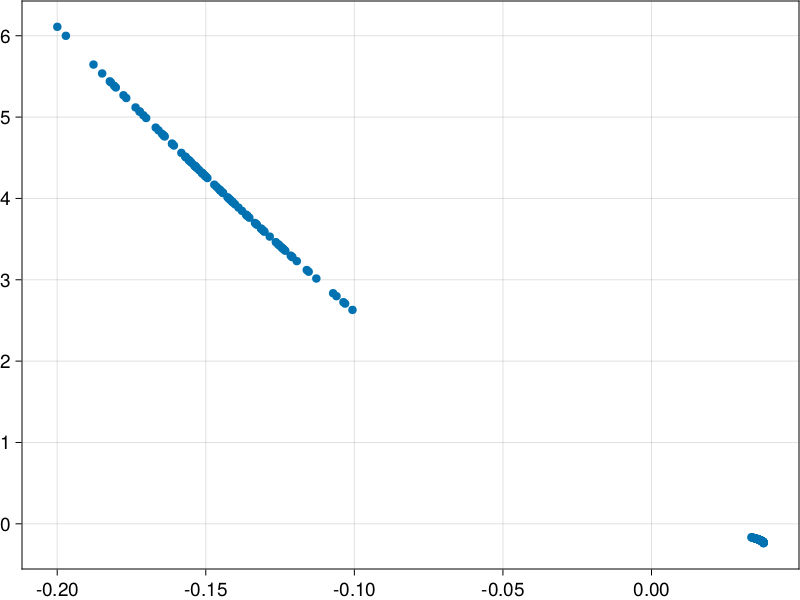

In [232]:
scatter(evecLc[:,1], inv(G)*vcat(cellPressures, -cellTensions))
scatter(evecLc[:,1], inv(G)*vcat(cellAreas.-1, cellPerimeters.-1))

In [1132]:
mkpath(datadir(f,"eigenmodes", "M_evecH"))
cellPolygons = makeCellPolygons(R,params,matrices)
for n=1:2*nVerts

    Aevlims=(-maximum(abs.(MevH[1:nCells,n])), maximum(abs.(MevH[1:nCells, n])))
    Levlims=(-maximum(abs.(MevH[ nCells+1:2*nCells,n])), maximum(abs.(MevH[nCells+1:2*nCells, n])))
    set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
    fig = Figure(resolution=(1500,500))

    a1=Axis(fig[1,1],aspect=DataAspect())
    a2=Axis(fig[2,1],aspect=DataAspect())
    hidedecorations!(a1)
    hidespines!(a1)
    hidedecorations!(a2)
    hidespines!(a2)
    for i=1:nCells
        poly!(a1,cellPolygons[i],color=[MevH[1:nCells,n][i]],colormap=:bwr,colorrange=Aevlims, strokecolor=(:black,1.0),strokewidth=1)
        poly!(a2,cellPolygons[i],color=[MevH[nCells+1:2*nCells,n][i]],colormap=:bwr,colorrange=Levlims, strokecolor=(:black,1.0),strokewidth=1)
    end
    Label(fig[2,1,Bottom()],"n = "*string(n),fontsize = 32)

    #hidedecorations!(ax22)
    #hidespines!(ax22)

    colsize!(fig.layout,1,Aspect(1,1.0))


    Colorbar(fig[1,2],limits=colorrange=Aevlims,colormap=:bwr,flipaxis=true)
    Colorbar(fig[2,2],limits=colorrange=Levlims,colormap=:bwr,flipaxis=true)


    Label(fig[1,1,Left()],string(L"Area"),fontsize = 32, rotation=π/2)
    Label(fig[2,1,Left()],string(L"Perimeter"),fontsize = 32, rotation=π/2)
    #Label( fig[0,:],"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀)*", δL = "*string(params.δL),fontsize = 32, color = (:black, 1))
    resize_to_layout!(fig)
    save(datadir(f,"eigenmodes", "M_evecH","MevH$(@sprintf("%03d", n)).png"),fig)

    #display(fig)
end

In [ ]:
cellPolygons = makeCellPolygons(R,params,matrices)
for n=1:2*nVerts

    Aevlims=(-maximum(abs.(M_EgX[1:nCells,n])), maximum(abs.(M_EgX[1:nCells, n])))
    Levlims=(-maximum(abs.(M_EgX[ nCells+1:2*nCells,n])), maximum(abs.(M_EgX[nCells+1:2*nCells, n])))
    set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
    fig = Figure(resolution=(1500,500))

    a1=Axis(fig[1,1],aspect=DataAspect())
    a2=Axis(fig[2,1],aspect=DataAspect())
    hidedecorations!(a1)
    hidespines!(a1)
    hidedecorations!(a2)
    hidespines!(a2)
    for i=1:nCells
        poly!(a1,cellPolygons[i],color=[M_EgX[1:nCells,n][i]],colormap=:bwr,colorrange=Aevlims, strokecolor=(:black,1.0),strokewidth=1)
        poly!(a2,cellPolygons[i],color=[M_EgX[nCells+1:2*nCells,n][i]],colormap=:bwr,colorrange=Levlims, strokecolor=(:black,1.0),strokewidth=1)
    end
    Label(fig[2,1,Bottom()],"n = "*string(n),fontsize = 32)

    #hidedecorations!(ax22)
    #hidespines!(ax22)

    colsize!(fig.layout,1,Aspect(1,1.0))


    Colorbar(fig[1,2],limits=colorrange=Aevlims,colormap=:bwr,flipaxis=true)
    Colorbar(fig[2,2],limits=colorrange=Levlims,colormap=:bwr,flipaxis=true)


    Label(fig[1,1,Left()],string(L"Area"),fontsize = 32, rotation=π/2)
    Label(fig[2,1,Left()],string(L"Perimeter"),fontsize = 32, rotation=π/2)
    #Label( fig[0,:],"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀)*", δL = "*string(params.δL),fontsize = 32, color = (:black, 1))
    resize_to_layout!(fig)
    save(datadir(f,"eigenmodes","M_evEgX","MevEgX$(@sprintf("%03d", n)).png"),fig)

    #display(fig)
end

In [1134]:
mkpath(datadir(f,"eigenmodes", "vertex"))
cellPolygons = makeCellPolygons(R,params,matrices)
for n=1:2*nVerts
#n=4
    Aevlims=(-maximum(abs.(MevH[1:nCells, :])), maximum(abs.(MevH[1:nCells, :])))
    set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
    fig = Figure(resolution=(1500,500))

    a1=Axis(fig[1,1],aspect=DataAspect())
    hidedecorations!(a1)
    hidespines!(a1)

    for i=1:nCells
        poly!(a1,cellPolygons[i],color=[MevH[1:nCells,n][i]],colormap=:bwr,colorrange=Aevlims, strokecolor=(:grey,1.0),strokewidth=0.5)
    end
    #Label(fig[2,1,Bottom()],"λ_"*string(n)*" = "*@sprintf("%.5E", evals[n]),fontsize = 32)

    #hidedecorations!(ax22)
    #hidespines!(ax22)

    colsize!(fig.layout,1,Aspect(1,1.0))


    #Colorbar(fig[1,2],limits=colorrange=Aevlims,colormap=:viridis,flipaxis=true)
    #Colorbar(fig[2,2],limits=colorrange=Levlims,colormap=:viridis,flipaxis=true)

    #Label( fig[0,:],"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀)*", δL = "*string(params.δL),fontsize = 32, color = (:black, 1))
    resize_to_layout!(fig)
    arrows!(a1, Point2f.(R),Vec2f.(reinterpret(SVector{2,Float64},evecH[:,n])), color=:black, arrowsize=7, lengthscale=0.3*L₀/γ)
    save(datadir(f,"eigenmodes","vertex","abs_scalemode_$(@sprintf("%03d", n))_Area.png"),fig)
    fig
end

In [274]:
Vec2f.(reinterpret(SVector{2,Float64},evecH[:,1]))

294-element Vector{Vec{2, Float32}}:
 [-0.00949365, 0.61056185]
 [-0.009492536, 0.61056405]
 [-0.009493968, 0.6105626]
 [-0.009492218, 0.61056185]
 [-0.00949373, 0.6105628]
 [-0.009493968, 0.61056185]
 [-0.009490864, 0.61056167]
 [-0.009493173, 0.6105621]
 [-0.009492058, 0.61056155]
 [-0.009492297, 0.6105625]
 ⋮
 [-0.009493173, 0.61056405]
 [-0.009491262, 0.61056376]
 [-0.009491104, 0.61056346]
 [-0.009493252, 0.6105625]
 [-0.009493014, 0.6105624]
 [-0.00949365, 0.6105626]
 [-0.009492536, 0.61056125]
 [-0.00949182, 0.61056197]
 [-0.009492456, 0.61056364]

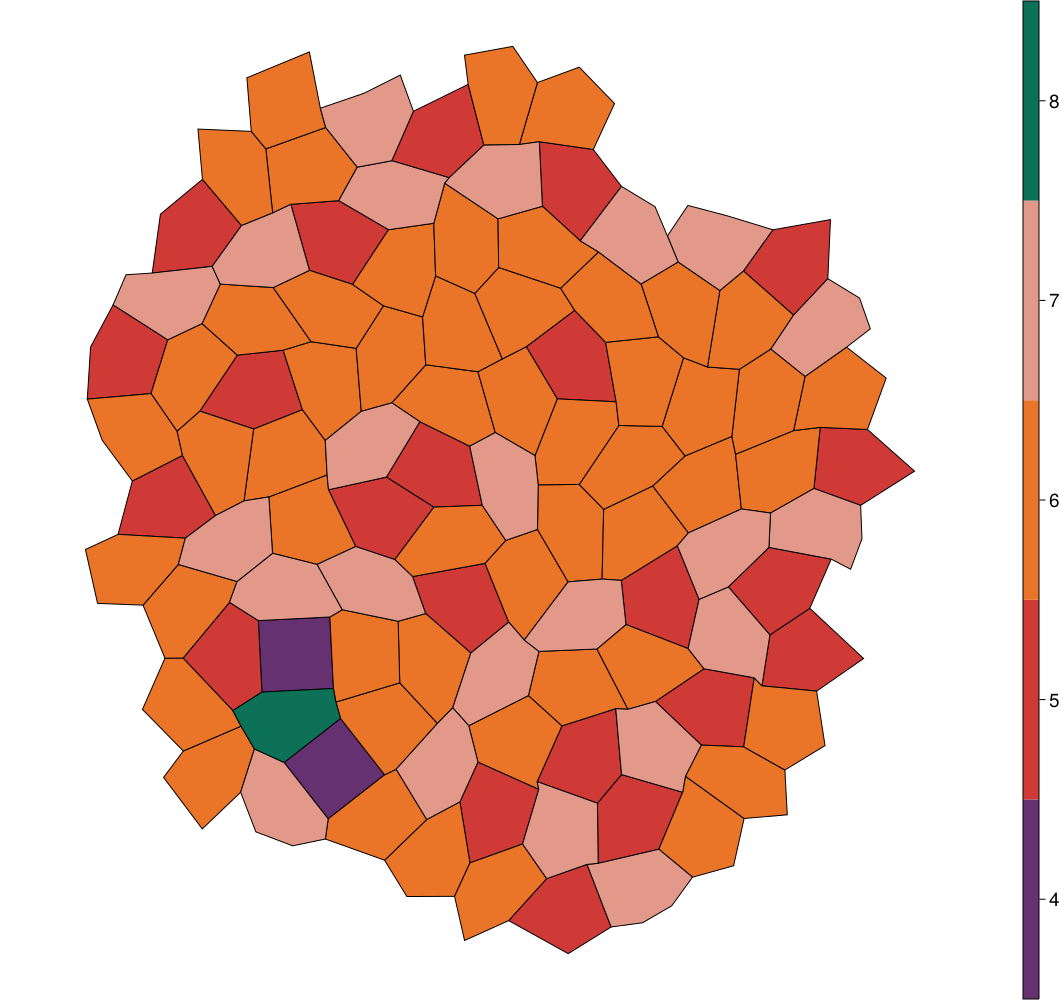

In [1133]:
cellPolygons = makeCellPolygons(R,params,matrices)
#Aevlims=(minimum(abs.(cellAreas[1:nCells])), maximum(abs.(cellAreas[1:nCells])))
#Levlims=(minimum(abs.(cellPerimeters[1:nCells])), maximum(abs.(cellPerimeters[1:nCells])))
set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
fig = Figure(resolution=(1000,1000))

a1=Axis(fig[1,1],aspect=DataAspect())
hidedecorations!(a1)
hidespines!(a1)

for i=1:nCells
    poly!(a1,cellPolygons[i],color=cellEdgeCount[i], colorrange=(minimum(cellEdgeCount),maximum(cellEdgeCount)), colormap=ColorSchemes.Java,strokecolor=(:black,1.0),strokewidth=1)
end
#Label(fig[2,1,Bottom()],"λ_"*string(n)*" = "*@sprintf("%.5E", evals[n]),fontsize = 32)

#hidedecorations!(ax22)
#hidespines!(ax22)

colsize!(fig.layout,1,Aspect(1,1.0))


cbar=Colorbar(fig[1,2],limits=(minimum(cellEdgeCount),maximum(cellEdgeCount)),colormap=cgrad(ColorSchemes.Java, length(unique(cellEdgeCount)), categorical=true),flipaxis=true)
cbar.ticks = ([4.4, 5.2, 6,6.8, 7.6], ["4", "5", "6","7", "8"])
#Colorbar(fig[2,2],limits=colorrange=Levlims,colormap=:viridis,flipaxis=true)

#Label( fig[0,:],"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀)*", δL = "*string(params.δL),fontsize = 32, color = (:black, 1))
#resize_to_layout!(fig)
#arrows!(a1, Point2f.(R), Vec2f.(hcat(evecH[1:2:end,6], evecH[2:2:end,6])), color=:green)
resize_to_layout!(fig)
save(datadir(f,"eigenmodes","edge_count_Γ_"*string(params.γ)*"_L0_"*string(params.L₀)*".png"),fig)
fig

In [ ]:

Peff=getPeff(params, matrices)
cellQ, cellJ=makeCellQandJ(params, matrices)
cellShearStress=getShearStress(params, matrices, cellJ)
shapeParameter=cellPerimeters./sqrt.(cellAreas)

In [38]:
modeSign=zeros(2*nVerts)
mode_mag_plus=zeros(2*nVerts)
mode_mag_minus=zeros(2*nVerts)
mode_magL_plus=zeros(2*nVerts)
mode_magL_minus=zeros(2*nVerts)
mode_magA_plus=zeros(2*nVerts)
mode_magA_minus=zeros(2*nVerts)
for n=1:2*nVerts
    a=MevH[1:nCells,n].*MevH[nCells+1:end,n]
    bA=MevH[1:nCells,n]
    bL=MevH[nCells+1:end,n]
    modeSign[n]=length(a[a.>0])
    mode_mag_plus[n]=sum(a[a.>0])
    mode_mag_minus[n]=sum(a[a.<0])
    mode_magL_plus[n]=sum(bL[a.>0])
    mode_magL_minus[n]=sum(bL[a.<0])
    mode_magA_plus[n]=sum(bA[a.>0])
    mode_magA_minus[n]=sum(bA[a.<0])
end
n=LinRange(1, 2*nVerts, 2*nVerts)
fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="Count", title="Number of cells with the same sign A and L modes")

#scatter!(ax,n, mode_magL_plus, color=:red, label="Σ L modes, same sign", markersize=7)
scatter!(ax,n, modeSign, color=:black, label="Σ L modes, opposite", markersize=7)
# scatter!(ax,n, mode_magA_plus.+ mode_magL_plus, color=:red, label="Σ same sign", markersize=7)
# scatter!(ax,n, mode_magA_minus.+ mode_magL_minus, color=:blue, label="Σ opposite sign", markersize=7)

#vlines!(ax,2*nVerts-(2*nCells) +0.5, color=:red)
#vlines!(ax,nCells+0.5, color=:red)
#fig[1, 2] = Legend(fig, ax, framevisible = false)
save(datadir(f,"eigenmodes", "vertex","mode_sign_verts.png"),fig)
fig

SystemError: SystemError: opening file "C:\\Users\\v35431nc\\Documents\\VM_code\\VertexModel\\data\\sims\\new_energy\\Reference_cells_3\\L₀=0.75_nCells=100_realTimetMax=2.16e6_γ=0.2_24-01-26-18-19-19\\eigenmodes\\vertex\\mode_sign_verts.png": No such file or directory

In [346]:
findall(x->x<127, modeSign)[15:end]

65-element Vector{Int64}:
 148
 176
 206
 324
 327
 328
 332
 339
 342
 349
   ⋮
 525
 529
 533
 536
 538
 541
 546
 559
 564

In [26]:
maximum(MevH[1:nCells,:]./MevH[nCells+1:end,:])

12.152109718485464